In [1]:
import warnings

# Data related
import numpy as np 
import pandas as pd

# sklearn 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import scikitplot.plotters as skplt
# nlp
from gensim.models import KeyedVectors

# models
import xgboost as xgb


In [2]:
warnings.filterwarnings('ignore')

from utils_functions import *

Using TensorFlow backend.


## 1. Load data 

In [3]:
df = pd.read_csv('../data/processed/train_variants_text.csv')
df=df.dropna(subset=['Text'])

## 2. Split into Train amd Validation data

In [4]:
X_tr, X_val, y_tr, y_val = split_data(df,
                                      'Text',
                                      'Class',
                                      0.1,
                                      0,
                                      stratify='Class')

## 3. Model

## 3.1 Bag-of-words+xgboost

In [22]:
clf = Pipeline([('vect', CountVectorizer(preprocessor=clean_text_stemmed, stop_words =stop_words)),
                ('tfidf', TfidfTransformer()),
                ('clf',  xgb.XGBClassifier(objective="multi:softprob", random_state=42))])                           

In [25]:
clf.fit(X_tr, y_tr)  
predicted = clf.predict(X_val)
acc=np.mean(predicted == y_val)
print(acc)

0.6756756756756757


## 3.2 Word2vec+xgboost

In [21]:
# Use document df
w2vec = get_word2vec(
    MySentences(
        df['Text'].values, 
    ),
    'w2vmodel'
)

w2vmodel not found. training model
Model done training. Saving to disk


In [ ]:
clf = Pipeline([('vect', MeanEmbeddingVectorizer(w2vec)),
                ('clf',  xgb.XGBClassifier(objective="multi:softprob", random_state=42))])                           

In [16]:
clf.fit(X_tr, y_tr)  
predicted = clf.predict(X_val)
acc=np.mean(predicted == y_val)
print(acc)

0.6186186186186187


## 3.3 Google News Corpora Word2Vec + xgboost

In [8]:
vector_path = r"/Users/j/Dropbox/Learn/kaggle_quora/src/data/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin"
gmodel = KeyedVectors.load_word2vec_format (vector_path, binary=True)


W0603 21:10:41.930970 140735731893120 smart_open_lib.py:385] this function is deprecated, use smart_open.open instead


In [9]:
clf = Pipeline([('vect', MeanEmbeddingVectorizer(gmodel)),
                ('clf',  xgb.XGBClassifier(objective="multi:softprob", random_state=42))])                           

In [10]:
clf.fit(X_tr, y_tr)  
predicted = clf.predict(X_val)
acc=np.mean(predicted == y_val)
print(acc)

0.5813253012048193


## 3.4 Medical Corpora Word2Vec + xgboost

In [5]:
vector_path = r"../src/pubmed2018_w2v_200D/pubmed2018_w2v_200D.bin"
biomodel = KeyedVectors.load_word2vec_format (vector_path, binary=True)

W0603 20:53:23.172096 140735731893120 smart_open_lib.py:385] this function is deprecated, use smart_open.open instead


In [6]:
clf = Pipeline([('vect', MeanEmbeddingVectorizer(biomodel)),
                ('clf',  xgb.XGBClassifier(objective="multi:softprob", random_state=42))])                           

In [7]:
clf.fit(X_tr, y_tr)  
predicted = clf.predict(X_val)
acc=np.mean(predicted == y_val)
print(acc)

0.6024096385542169


/Users/j/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


AxesSubplot(0.125,0.125;0.62x0.755)


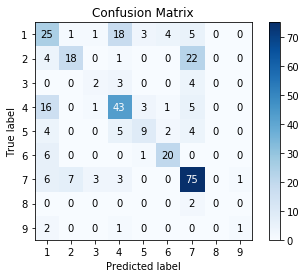

In [15]:
print(skplt.plot_confusion_matrix(y_val, predicted))